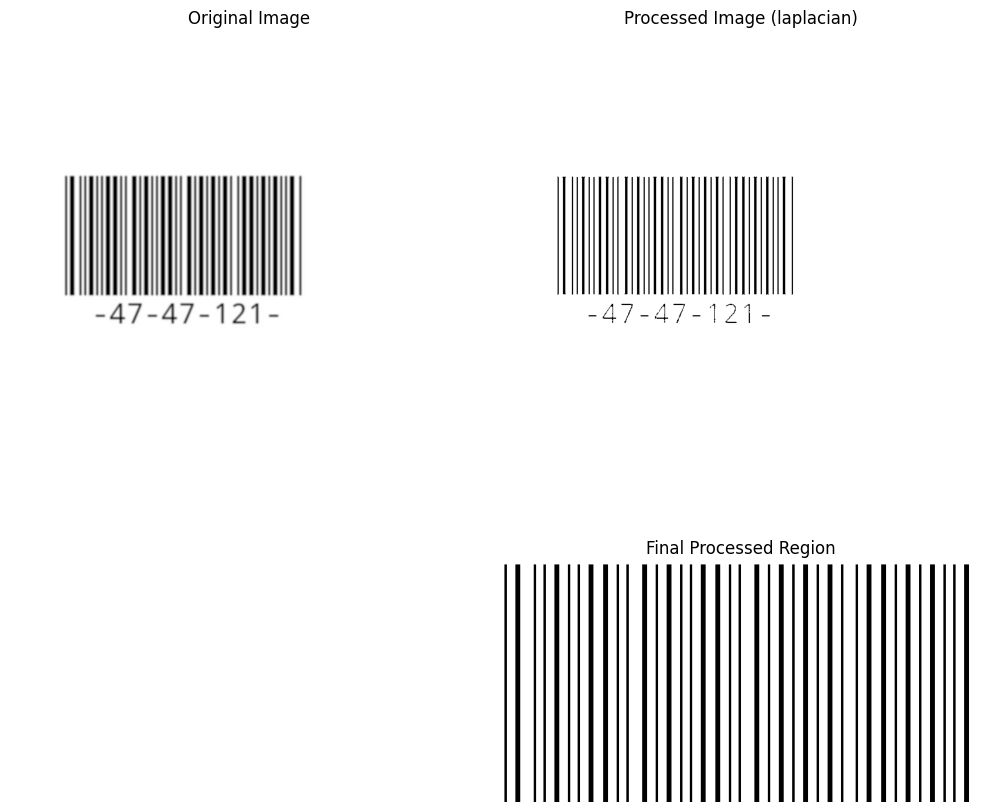

No barcode region detected.


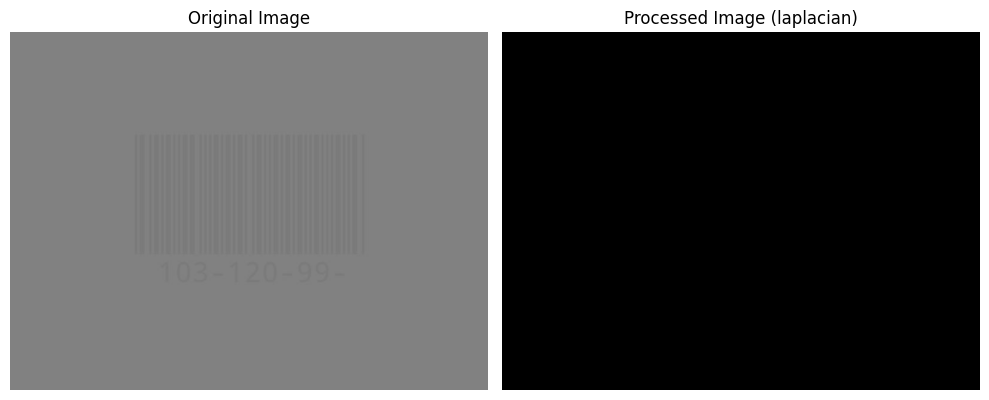

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Generalized function for processing and detecting barcode
def process_image(image_path, method="brightness_contrast"):
    # Read the image
    image = cv2.imread(image_path)
    if image is None:
        raise FileNotFoundError(f"Image at {image_path} could not be loaded.")

    # Convert to grayscale
    gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

    if method == "laplacian":

      sharpen_kernel = np.array([[-1, -1, -1],
                                [-1, 12, -1],
                                [-1, -1, -1]],
                                dtype=np.float32)


      processed_image1 = cv2.filter2D(src=gray_image,
                                      ddepth=-1,
                                  kernel=sharpen_kernel)

      processed_image = cv2.adaptiveThreshold(
            processed_image1, 255, cv2.ADAPTIVE_THRESH_GAUSSIAN_C, cv2.THRESH_BINARY, 187, 2
        )

    elif method == "identity_filter":
        processed_image = gray_image

    elif method == "adaptive_threshold":
        processed_image = cv2.adaptiveThreshold(
            gray_image, 255, cv2.ADAPTIVE_THRESH_GAUSSIAN_C, cv2.THRESH_BINARY, 187, 2
        )

    else:
        processed_image = gray_image

    # Step 1: Edge detection
    edges = cv2.Canny(processed_image, 100, 200)

    # Step 2: Detect lines with Hough Transform
    lines = cv2.HoughLinesP(edges, 1, np.pi / 180, threshold=100, minLineLength=100, maxLineGap=10)

    # Initialize bounding box coordinates
    min_x, max_x, min_y, max_y = float('inf'), -float('inf'), float('inf'), -float('inf')

# Use Canny edge detection
    edges = cv2.Canny(processed_image, 100, 200)

    # Detect vertical lines using Hough Line Transform
    lines = cv2.HoughLinesP(edges, 1, np.pi / 180, threshold=100, minLineLength=100, maxLineGap=10)

    # Initialize bounding box coordinates
    min_x, max_x, min_y, max_y = float('inf'), -float('inf'), float('inf'), -float('inf')

    if lines is not None:
        for line in lines:
            x1, y1, x2, y2 = line[0]
            # Vertical lines: x1 == x2 or nearly vertical
            if abs(x1 - x2) < 10:
                min_x = min(min_x, x1)
                max_x = max(max_x, x1)
                min_y = min(min_y, y1, y2)
                max_y = max(max_y, y1, y2)

    # Crop the barcode region if valid lines were detected
    if min_x != float('inf') and max_x != -float('inf') and min_y != float('inf') and max_y != -float('inf'):
        cropped_image = processed_image[min_y:max_y, min_x:max_x]
    else:
        cropped_image = None

    if cropped_image is not None:
        kernel = np.ones((2,2), np.uint8)
        dilated_image = cv2.dilate(cropped_image, kernel, iterations=1)
        final_image = cv2.erode(dilated_image, kernel, iterations=1)
    else:
        final_image = None

    # Display results
    plt.figure(figsize=(10, 10))
    plt.subplot(2, 2, 1)
    plt.title("Original Image")
    plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
    plt.axis('off')

    plt.subplot(2, 2, 2)
    plt.title(f"Processed Image ({method})")
    plt.imshow(processed_image, cmap='gray')
    plt.axis('off')

    if final_image is not None:
        plt.subplot(2, 2, 4)
        plt.title("Final Processed Region")
        plt.imshow(final_image, cmap='gray')
        plt.axis('off')
        cv2.imwrite("final_processed_image.jpg", final_image)
    else:
        print("No barcode region detected.")

    plt.tight_layout()
    plt.show()

    return final_image


# Example usage
#image_path1 = "/content/01 - lol easy.jpg"
#image_path2 = "/content/02 - still easy.jpg"
image_path4 = "/content/04 - fen el nadara.jpg"
#image_path5 = "/content/05 - meen taffa el nour!!!.jpg"
#image_path6 = "/content/06 - meen fata7 el nour 333eenaaayy.jpg"


# Test with different methods
#process_image(image_path1, method="")
#process_image(image_path2, method="")
process_image(image_path4, method="laplacian")
#process_image(image_path5, method="adaptive_threshold")
#process_image(image_path6, method="adaptive_threshold")
